# Development of Optimal Longsleeve Sizing

### 1. The problem: a large sports outfit manufacturing company tries to address a problem in traditional (XS-XL) long sleeve sizing. In many cases when the clothing fits shoulders sleeves are too long/short.

### 2. The objective: develop a new sizing model addressing the problem.

### 3. Data Used for Work: ANSUR II Dataset (https://www.openlab.psu.edu/ansur2/)

### 4. Important Note: an extremely large amount of sizes may shock customers and increase manufacturing expenses.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.decomposition import PCA
from pathlib import Path

from sklearn.ensemble import RandomForestRegressor

In [2]:
# Raw data import (males)
data_m = pd.read_csv('ANSUR_II_MALE_Public.csv', encoding = "ISO-8859-1")

### Understanding the data

In [3]:
data_m.shape

(4082, 108)

In [4]:
data_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
data_m.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,...,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,20003.370897,254.650906,1440.736894,335.244488,229.343949,1329.082068,252.017148,200.935081,415.675649,358.135718,...,387.642822,1056.485301,855.239588,175.916707,847.511514,8.973542,1.534052,30.158991,70.035767,188.004900
std,6568.435122,37.327178,63.287242,17.482795,14.649102,59.516123,12.936131,10.470947,19.161654,34.618093,...,29.349007,52.154671,142.206992,8.955055,41.655628,83.012638,0.958815,8.810118,2.947419,29.941869
min,10027.000000,163.000000,1194.000000,270.000000,156.000000,1106.000000,186.000000,156.000000,337.000000,246.000000,...,293.000000,876.000000,393.000000,141.000000,695.000000,1.000000,1.000000,17.000000,60.000000,0.000000
25%,14270.250000,227.000000,1398.000000,324.000000,219.250000,1289.000000,243.000000,194.000000,403.000000,335.000000,...,367.000000,1020.000000,756.000000,170.000000,819.000000,1.000000,1.000000,23.000000,68.000000,168.000000
50%,17236.500000,251.000000,1439.000000,335.000000,228.000000,1328.000000,252.000000,201.000000,415.000000,357.000000,...,386.000000,1055.000000,846.000000,176.000000,847.000000,1.000000,1.000000,28.000000,70.000000,185.000000
75%,27315.750000,279.000000,1481.000000,346.000000,239.000000,1367.000000,261.000000,208.000000,428.000000,380.000000,...,407.000000,1090.000000,944.000000,182.000000,875.000000,2.000000,2.000000,36.000000,72.000000,207.000000
max,29452.000000,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.000000,245.000000,489.000000,490.000000,...,494.000000,1245.000000,1442.000000,216.000000,1009.000000,4251.000000,8.000000,58.000000,94.000000,321.000000


In [6]:
for i in range(data_m.shape[1]):
    print(i, data_m.isnull().sum()[i]) #3180 NULLs in column 103

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 3180
103 0
104 0
105 0
106 0
107 0


In [7]:
data_m.iloc[:, 102] # The only column containing NULLs is Ethnicity column 
                    # (which doesn't seem extremely important for the analysis)

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                   ...            
4077    Blackfoot Cherokee Choctaw
4078                           NaN
4079                           NaN
4080                           NaN
4081                           NaN
Name: Ethnicity, Length: 4082, dtype: object

### Data Cleaning

In [8]:
relevant_cols = [col for col in data_m.columns if ('sleeve' in col) or ('shoulder' in col) \
                 or ('arm' in col) or ('wrist' in col) or ('hand' in col) \
                 or ('chest' in col) or ('abdominal' in col) or ('acromion' in col)\
                 or ('acromial' in col) or ('neck' in col) or ('waist' in col)]
len(relevant_cols)

30

In [9]:
data_cl_m = data_m[relevant_cols]
data_cl_m.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,biacromialbreadth,chestbreadth,chestcircumference,chestdepth,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,...,sleevelengthspinewrist,sleeveoutseam,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight
0,266,1467,337,401,291,1074,259,1292,349,299,...,883,600,501,329,933,240,440,1054,175,853
1,233,1395,326,394,269,1021,253,1244,348,289,...,868,564,432,316,870,225,371,1054,167,815
2,287,1430,341,427,288,1120,267,1288,355,357,...,910,604,472,329,964,255,411,1041,180,831
3,234,1347,310,401,296,1114,262,1205,352,318,...,848,550,461,315,857,205,399,968,176,793
4,250,1585,372,435,304,1048,232,1452,399,324,...,995,641,467,303,868,214,379,1245,188,954


In [10]:
data_cl_m.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,biacromialbreadth,chestbreadth,chestcircumference,chestdepth,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,...,sleevelengthspinewrist,sleeveoutseam,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,...,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,254.650906,1440.736894,335.244488,415.675649,289.441450,1058.705537,253.847134,1291.118569,349.010289,310.058550,...,895.847134,593.124449,477.612445,326.437286,940.577413,237.771436,387.642822,1056.485301,175.916707,847.511514
std,37.327178,63.287242,17.482795,19.161654,18.279344,87.435272,26.246735,56.956697,18.015101,21.990993,...,40.220218,30.819632,27.728286,34.738095,111.705875,34.732597,29.349007,52.154671,8.955055,41.655628
min,163.000000,1194.000000,270.000000,337.000000,231.000000,774.000000,176.000000,1088.000000,290.000000,233.000000,...,732.000000,488.000000,383.000000,232.000000,648.000000,151.000000,293.000000,876.000000,141.000000,695.000000
25%,227.000000,1398.000000,324.000000,403.000000,277.000000,996.000000,236.000000,1252.250000,337.000000,295.000000,...,868.000000,572.000000,459.250000,301.000000,857.000000,212.000000,367.000000,1020.000000,170.000000,819.000000
50%,251.000000,1439.000000,335.000000,415.000000,289.000000,1056.000000,253.000000,1289.000000,348.500000,310.000000,...,895.000000,592.000000,477.000000,325.000000,937.000000,234.000000,386.000000,1055.000000,176.000000,847.000000
75%,279.000000,1481.000000,346.000000,428.000000,301.000000,1117.000000,272.000000,1329.000000,361.000000,324.000000,...,922.000000,612.000000,495.000000,350.000000,1016.000000,261.000000,407.000000,1090.000000,182.000000,875.000000
max,451.000000,1683.000000,393.000000,489.000000,363.000000,1469.000000,383.000000,1506.000000,416.000000,402.000000,...,1058.000000,709.000000,598.000000,459.000000,1379.000000,406.000000,494.000000,1245.000000,216.000000,1009.000000


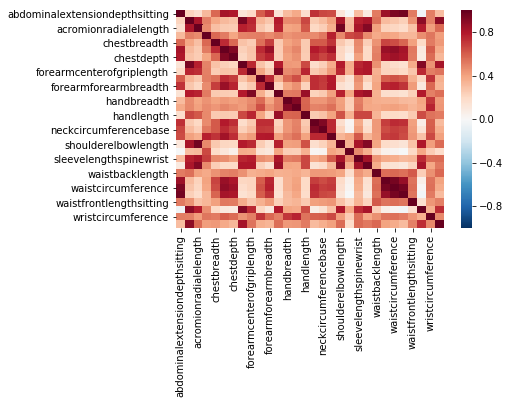

In [11]:
# Correlation heatmap of obtained features
sns.heatmap(data_cl_m.corr(), vmin=-1, vmax=1, cmap='RdBu_r');

In [12]:
X = data_cl_m.drop(['sleevelengthspinewrist', 'sleeveoutseam'], axis=1)
Y = data_cl_m["sleevelengthspinewrist"]
relevant_cols.remove("sleevelengthspinewrist")
relevant_cols.remove("sleeveoutseam")
names = relevant_cols
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.3503, 'shoulderelbowlength'), (0.2405, 'forearmhandlength'), (0.1485, 'acromionradialelength'), (0.0723, 'shouldercircumference'), (0.059, 'biacromialbreadth'), (0.0101, 'forearmforearmbreadth'), (0.0097, 'chestbreadth'), (0.0095, 'forearmcenterofgriplength'), (0.0079, 'shoulderlength'), (0.0069, 'chestheight'), (0.0066, 'waistheightomphalion'), (0.0065, 'chestcircumference'), (0.0058, 'chestdepth'), (0.0057, 'waistbacklength'), (0.0054, 'wristheight'), (0.0054, 'forearmcircumferenceflexed'), (0.0054, 'acromialheight'), (0.0051, 'handlength'), (0.0048, 'waistfrontlengthsitting'), (0.0046, 'waistbreadth'), (0.0045, 'handcircumference'), (0.0044, 'wristcircumference'), (0.0039, 'waistdepth'), (0.0039, 'neckcircumferencebase'), (0.0038, 'abdominalextensiondepthsitting'), (0.0036, 'neckcircumference'), (0.0031, 'waistcircumference'), (0.0028, 'handbreadth')]
